# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [4]:
# your code here
import pandas as pd
exch_df = pd.read_csv('exch_rates.csv')

In [5]:
# your code here
exch_df.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

In [6]:
# your code here
exch_df.Frequency = pd.to_datetime(exch_df.Frequency)
exch_df.set_index('Frequency', inplace=True)

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

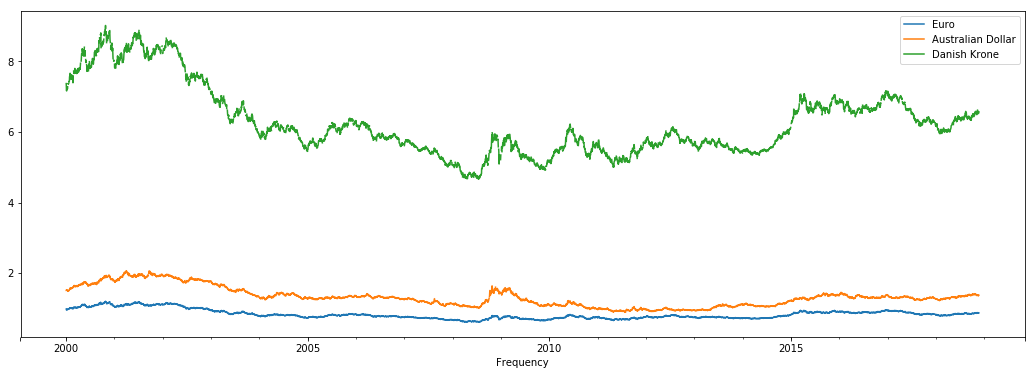

In [7]:
# your code here
exch_df.plot(figsize=(18,6));

### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [8]:
# your code here
exch_df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


In [9]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline

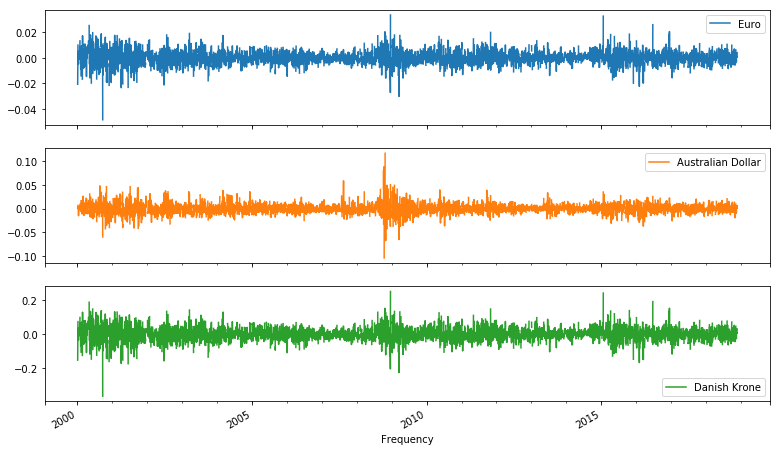

In [10]:
# your code here
exch_df_diff = exch_df.diff(periods=1)
exch_df_diff.plot(figsize=(13,8), subplots=True, legend=True);

In [11]:
exch_df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [12]:
# your code here
euro = exch_df[['Euro']]

          Euro      Euro
Euro  1.000000  0.999146
Euro  0.999146  1.000000


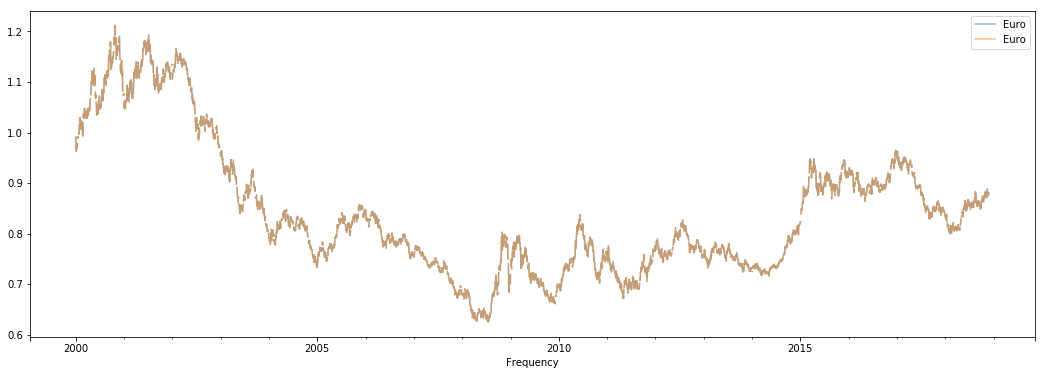

In [14]:
# your code here
euro_shift_1 = euro.shift(periods=1)
print(lag_1.corr())
lag_1= pd.concat([euro_shift_1, euro], axis=1)
lag_1.plot(figsize=(18,6), alpha=0.5);

In [ ]:
# your code here

Repeat this, but for a "lag 5 autocorrelation"

In [15]:
# your code here
euro_shift_50 = euro.shift(periods=50)

          Euro      Euro
Euro  1.000000  0.968321
Euro  0.968321  1.000000


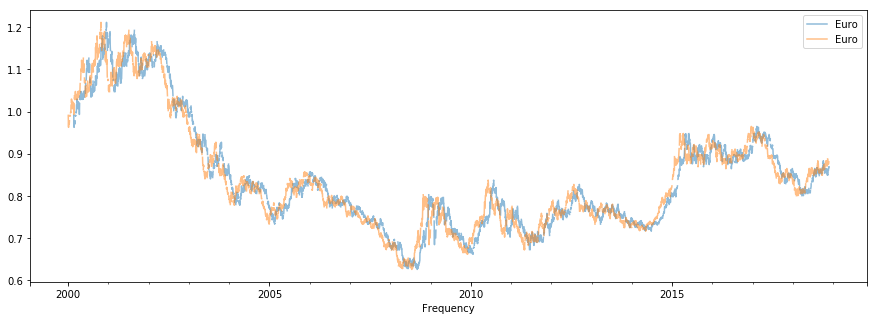

In [16]:
# your code here
lag_50 = pd.concat([euro_shift_50, euro], axis=1)

print(lag_50.corr())

lag_50.plot(figsize=(15,5), alpha=0.5);

### What's your conclusion here?

Knowing this, let's plot the ACF now.

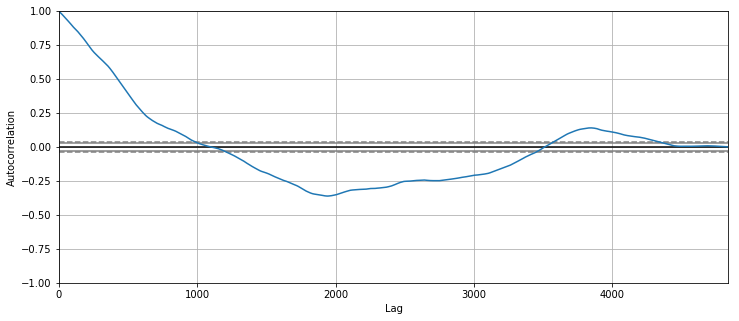

In [17]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

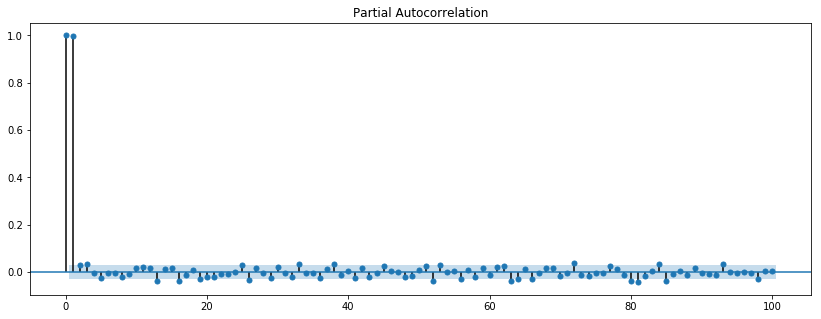

In [21]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [23]:
# your code here
pass_df = pd.read_csv('passengers.csv')

In [27]:
# your code here
pass_df.Month = pd.to_datetime(pass_df.Month)

In [29]:
pass_df.set_index('Month', inplace=True)

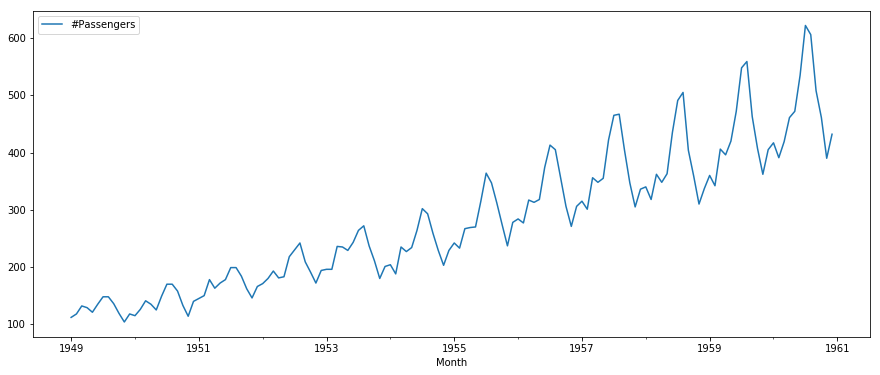

In [32]:
pass_df.plot(figsize=(15,6));

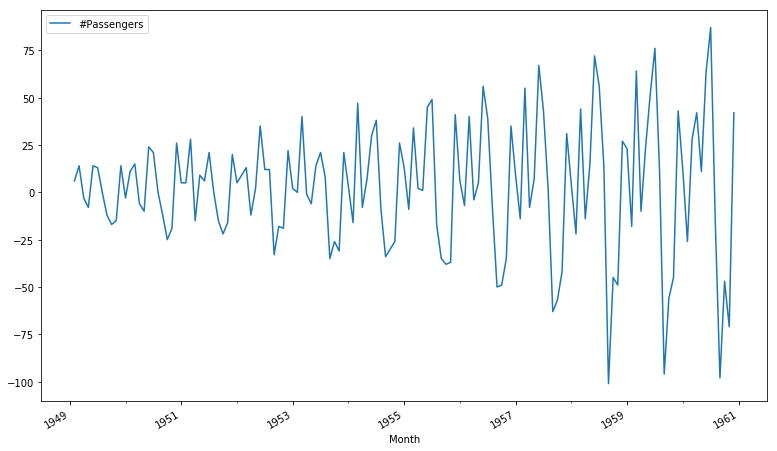

In [34]:
# your code here
pass_df_diff = pass_df.diff(periods=1)
pass_df_diff.plot(figsize=(13,8), subplots=True, legend=True);

             #Passengers  #Passengers
#Passengers     1.000000     0.960195
#Passengers     0.960195     1.000000


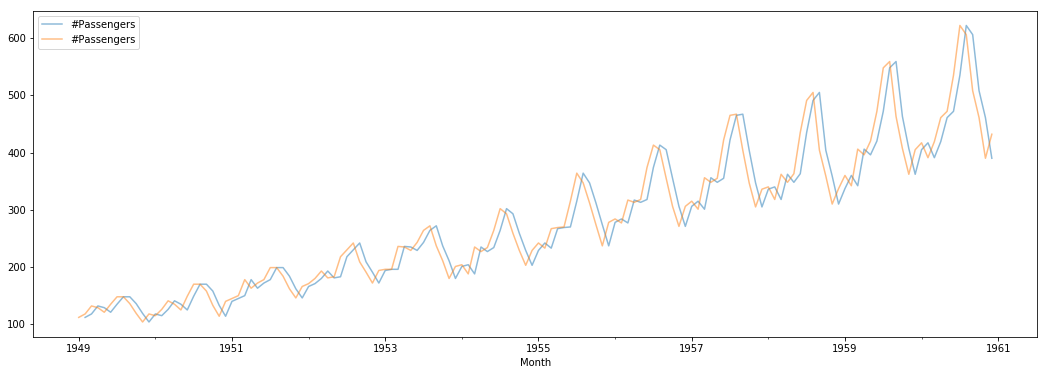

In [35]:
# your code here
pass_shift_1 = pass_df.shift(periods=1)
p_lag_1= pd.concat([pass_shift_1, pass_df], axis=1)
p_lag_1.plot(figsize=(18,6), alpha=0.5);
print(p_lag_1.corr())

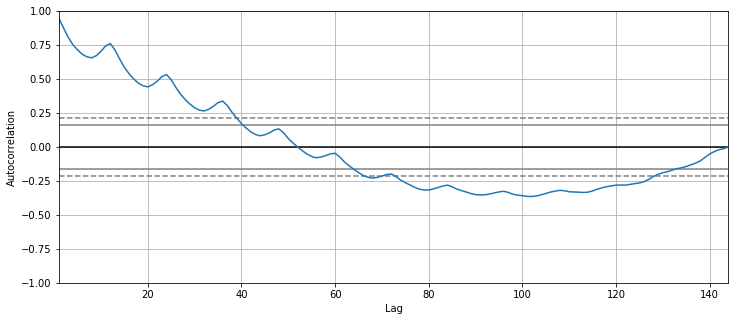

In [39]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(pass_df.dropna());

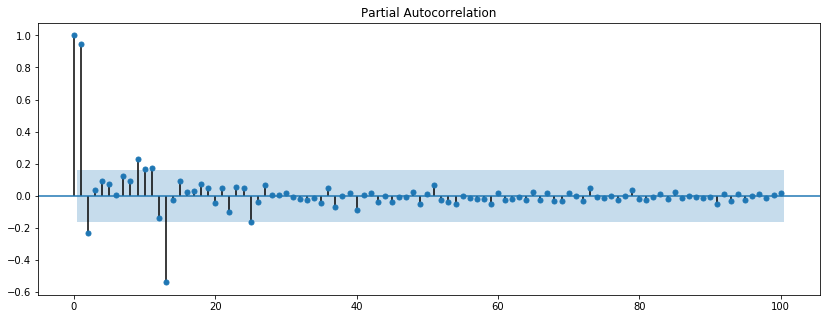

In [45]:
# your code here
rcParams['figure.figsize'] = 14, 5

plot_pacf(pass_df.dropna(), lags = 100, method='ywm');

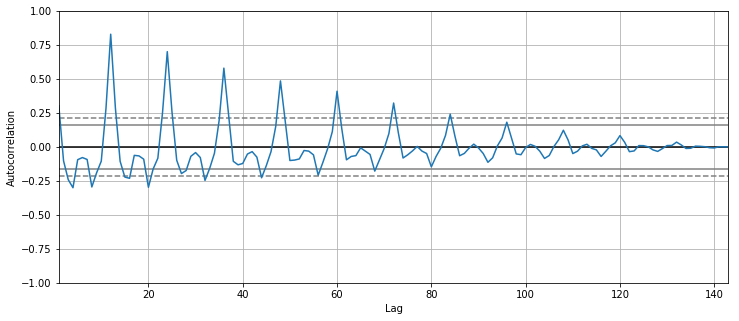

In [46]:
# your code here
air_diff = pass_df.diff(periods=1)

plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_diff.dropna());

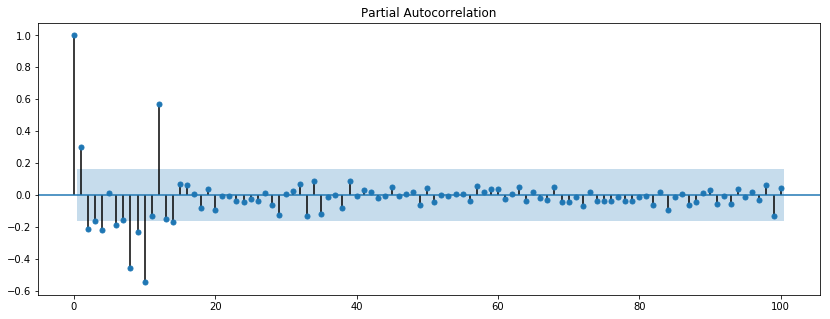

In [47]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(air_diff.dropna(), lags = 100, method='ywm');

### Your conclusion here

In [ ]:
# The result reminds us a lot of the google trends data. 
# The seasonality is much more clear in the differenced time series. 
# The PACF has just one very strong correlation, right at 12 months.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [50]:
# your code here
nyse_df = pd.read_csv('NYSE_monthly.csv')
nyse_df.Month = pd.to_datetime(nyse_df.Month)
nyse_df.set_index('Month', inplace=True)

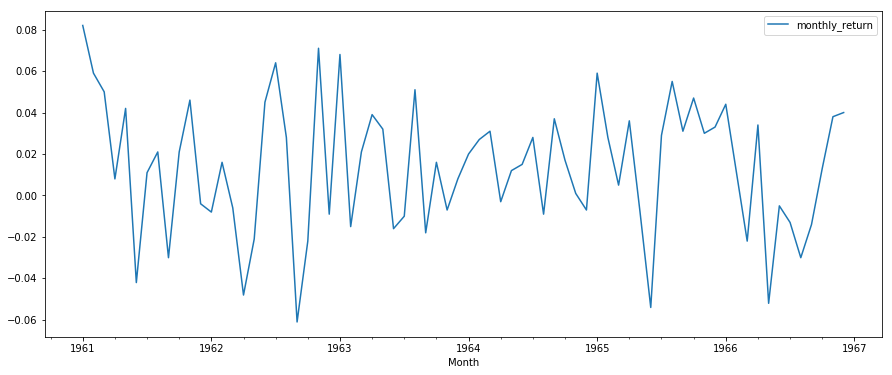

In [51]:
nyse_df.plot(figsize=(15,6));

             #Passengers  #Passengers
#Passengers     1.000000     0.960195
#Passengers     0.960195     1.000000


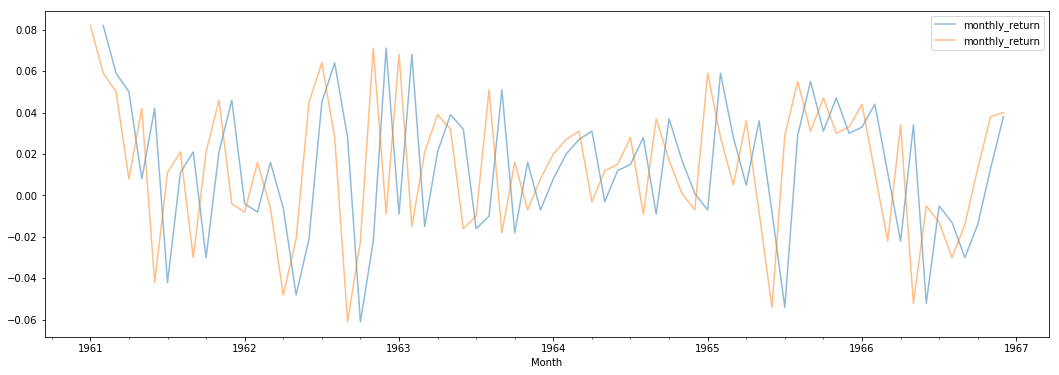

In [52]:
# your code here
nyse_shift_1 = nyse_df.shift(periods=1)
nyse_lag_1= pd.concat([nyse_shift_1, nyse_df], axis=1)
nyse_lag_1.plot(figsize=(18,6), alpha=0.5);
print(p_lag_1.corr())

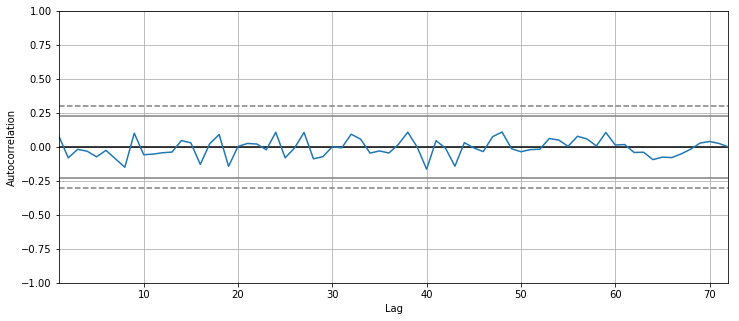

In [53]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse_df.dropna());

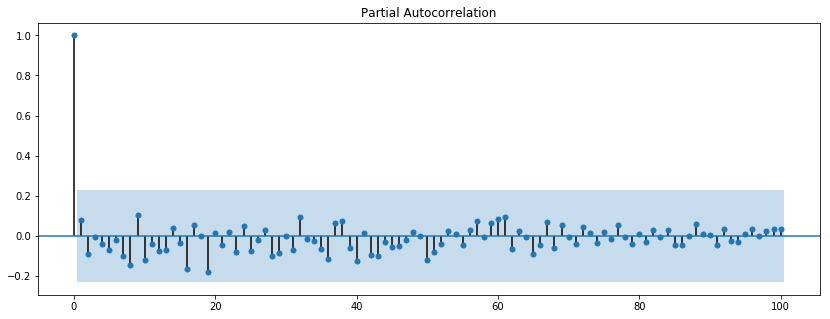

In [54]:
# your code here
rcParams['figure.figsize'] = 14, 5

plot_pacf(nyse_df.dropna(), lags = 100, method='ywm');

## Your conclusion here

In [ ]:
# Autocorrelations and partial autocorrelations are virtually 0 for any lag. 
# This is no surprise! The NYSE series was a white noise series, meaning there is no trend or no seasonality! 
# This is, again, a typical result for these kind of series.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!